In [1]:
# 导入warnings包，利用过滤器来实现忽略警告语句
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import scipy.stats as st

In [39]:
# 载入训练集和测试集：
Train_data = pd.read_csv(r'D:\PythonProjects\userCarForecast\data\used_car_train_20200313.csv', sep=',')
Test_data=pd.read_csv(r'D:\PythonProjects\userCarForecast\data\used_car_testA_20200313.csv')

In [5]:
# 简略观察数据(head()+shape)
Train_data.head().append(Train_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30,6,1,0.0,0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914763
1,1,2262,20030301,40,1,2,0.0,0,0,15,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115,15,1,0.0,0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109,10,0,0.0,1,193,15,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110,5,1,0.0,0,68,5,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121,10,4,0.0,1,163,15,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116,11,0,0.0,0,125,10,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60,11,1,1.0,0,90,6,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34,10,3,1.0,0,156,15,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19,28,6,0.0,1,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [6]:
Train_data.shape

(150000, 31)

In [7]:
Test_data.head().append(Test_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222,4,5,1.0,1,313,15,...,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19,21,0,0.0,0,75,12.5,...,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82,21,0,0.0,0,109,7,...,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0,0,0,0.0,1,160,7,...,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26,14,2,0.0,0,75,15,...,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290
49995,199995,20903,19960503,4,4,4,0.0,0,116,15,...,0.284664,0.130044,0.049833,0.028807,0.004616,-5.978511,1.303174,-1.207191,-1.981240,-0.357695
49996,199996,708,19991011,0,0,0,0.0,0,75,15,...,0.268101,0.108095,0.066039,0.025468,0.025971,-3.913825,1.759524,-2.075658,-1.154847,0.169073
49997,199997,6693,20040412,49,1,0,1.0,1,224,15,...,0.269432,0.105724,0.117652,0.057479,0.015669,-4.639065,0.654713,1.137756,-1.390531,0.254420
49998,199998,96900,20020008,27,1,0,0.0,1,334,15,...,0.261152,0.000490,0.137366,0.086216,0.051383,1.833504,-2.828687,2.465630,-0.911682,-2.057353
49999,199999,193384,20041109,166,6,1,1.0,68,9,0,...,0.000300,0.103534,0.080625,0.124264,2.914571,-1.135270,0.547628,2.094057,-1.552150,NaN


In [9]:
Test_data.shape

(50000, 30)

In [10]:
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,regionCode,seller,offerType,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,148531.000000,146417.000000,135884.000000
mean,74999.500000,68349.172873,2.003417e+07,47.128953,8.052527,1.870747,1.394827,1.997783e+05,2.841478e+05,1.415701e+06,...,0.246643,0.062381,0.174574,0.296920,0.406928,-0.164371,-0.446352,-0.085471,0.022190,0.008456
std,43301.414527,61103.875095,5.364988e+04,49.535881,7.864603,5.221312,15.676749,1.985073e+06,2.376421e+06,5.151321e+06,...,0.116636,0.133581,0.927042,1.773396,1.962003,3.758661,2.002930,2.257730,1.267140,1.050417
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,-0.273510,-8.206004,-8.399672,-9.168192,-9.404106,-9.639552,-6.113291,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,7.390000e+02,0.000000e+00,0.000000e+00,...,0.241064,0.000161,0.055272,0.036050,0.035225,-3.666042,-2.026105,-1.745234,-0.999703,-0.426907
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,2.010000e+03,0.000000e+00,0.000000e+00,...,0.256928,0.001547,0.090081,0.058523,0.063335,1.240603,-0.457218,-0.160305,0.008602,0.155026
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,3.719000e+03,0.000000e+00,0.000000e+00,...,0.265170,0.104255,0.120590,0.081996,0.094738,2.691063,1.115744,1.572130,0.929041,0.700543
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,999.000000,3500.000000,2.016041e+07,2.016041e+07,2.016041e+07,...,1.401999,1.387847,12.357011,18.819042,18.801218,18.802072,13.562011,11.147669,8.658418,2.743993


In [11]:
# 通过describe()来熟悉数据的相关统计量
Test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,regionCode,seller,offerType,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.00000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,49548.000000,48880.000000,45356.000000
mean,174999.500000,68542.223280,2.003393e+07,46.844520,8.056240,1.82978,1.310420,1.846027e+05,2.693423e+05,1.420901e+06,...,0.245942,0.062157,0.167631,0.278298,0.394680,-0.180498,-0.441886,-0.093695,0.018620,0.010720
std,14433.901067,61052.808133,5.368870e+04,49.469548,7.819477,4.38703,11.319999,1.907934e+06,2.314646e+06,5.160173e+06,...,0.113548,0.132116,0.889236,1.705061,1.904670,3.749435,2.011260,2.264558,1.262383,1.039922
min,150000.000000,0.000000,1.991000e+07,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,-4.137733e+00,...,0.000000,0.000000,0.000000,-7.481381,-8.088973,-9.160049,-8.916949,-8.249206,-5.881834,-6.112667
25%,162499.750000,11203.500000,1.999091e+07,10.000000,1.000000,0.00000,0.000000,7.500000e+02,0.000000e+00,0.000000e+00,...,0.241186,0.000157,0.055647,0.035926,0.034963,-3.656769,-2.033607,-1.744112,-0.999841,-0.428772
50%,174999.500000,52248.500000,2.003091e+07,29.000000,6.000000,1.00000,0.000000,2.025000e+03,0.000000e+00,0.000000e+00,...,0.257005,0.005279,0.090068,0.058519,0.063502,1.208642,-0.447549,-0.165747,0.009142,0.152347
75%,187499.250000,118856.500000,2.007110e+07,65.000000,13.000000,3.00000,1.000000,3.739000e+03,0.000000e+00,0.000000e+00,...,0.265163,0.104231,0.120749,0.081606,0.094614,2.675705,1.136973,1.567727,0.924715,0.702953
max,199999.000000,196805.000000,2.015121e+07,246.000000,39.000000,500.00000,610.000000,2.016041e+07,2.016041e+07,2.016041e+07,...,1.339804,1.332522,12.338872,18.761276,18.811053,18.856218,12.950498,7.430223,5.228962,2.624622


In [12]:
# 通过info()来熟悉数据类型
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                150000 non-null int64
brand                150000 non-null int64
bodyType             150000 non-null int64
fuelType             150000 non-null float64
gearbox              150000 non-null object
power                150000 non-null object
kilometer            150000 non-null object
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null float64
creatDate            150000 non-null float64
price                150000 non-null float64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4      

In [13]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
SaleID               50000 non-null int64
name                 50000 non-null int64
regDate              50000 non-null int64
model                50000 non-null int64
brand                50000 non-null int64
bodyType             50000 non-null int64
fuelType             50000 non-null float64
gearbox              50000 non-null object
power                50000 non-null object
kilometer            50000 non-null object
notRepairedDamage    50000 non-null object
regionCode           50000 non-null int64
seller               50000 non-null float64
offerType            50000 non-null float64
creatDate            50000 non-null float64
v_0                  50000 non-null float64
v_1                  50000 non-null float64
v_2                  50000 non-null float64
v_3                  50000 non-null float64
v_4                  50000 non-null float64
v_5                  50000 no

In [14]:
# 查看每列的存在nan情况
Train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    0
brand                    0
bodyType                 0
fuelType                 0
gearbox                  0
power                    0
kilometer                0
notRepairedDamage        0
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                  1469
v_13                  3583
v_14                 14116
dtype: int64

In [16]:
Test_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType                0
fuelType                0
gearbox                 0
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                  452
v_13                 1120
v_14                 4644
dtype: int64

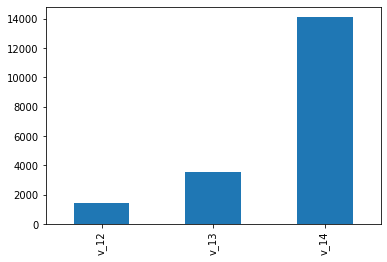

In [17]:
# nan可视化
missing = Train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

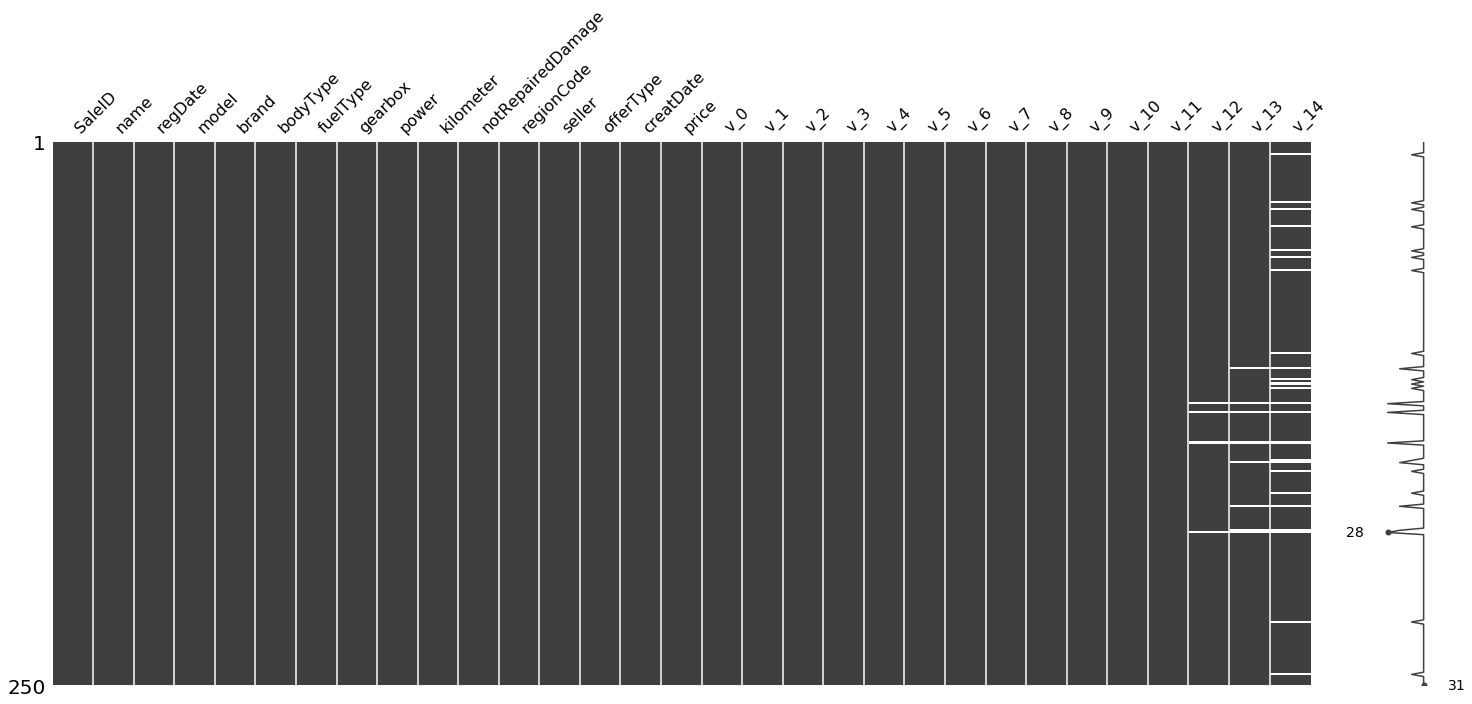

In [18]:
# 可视化看下缺省值
msno.matrix(Train_data.sample(250))

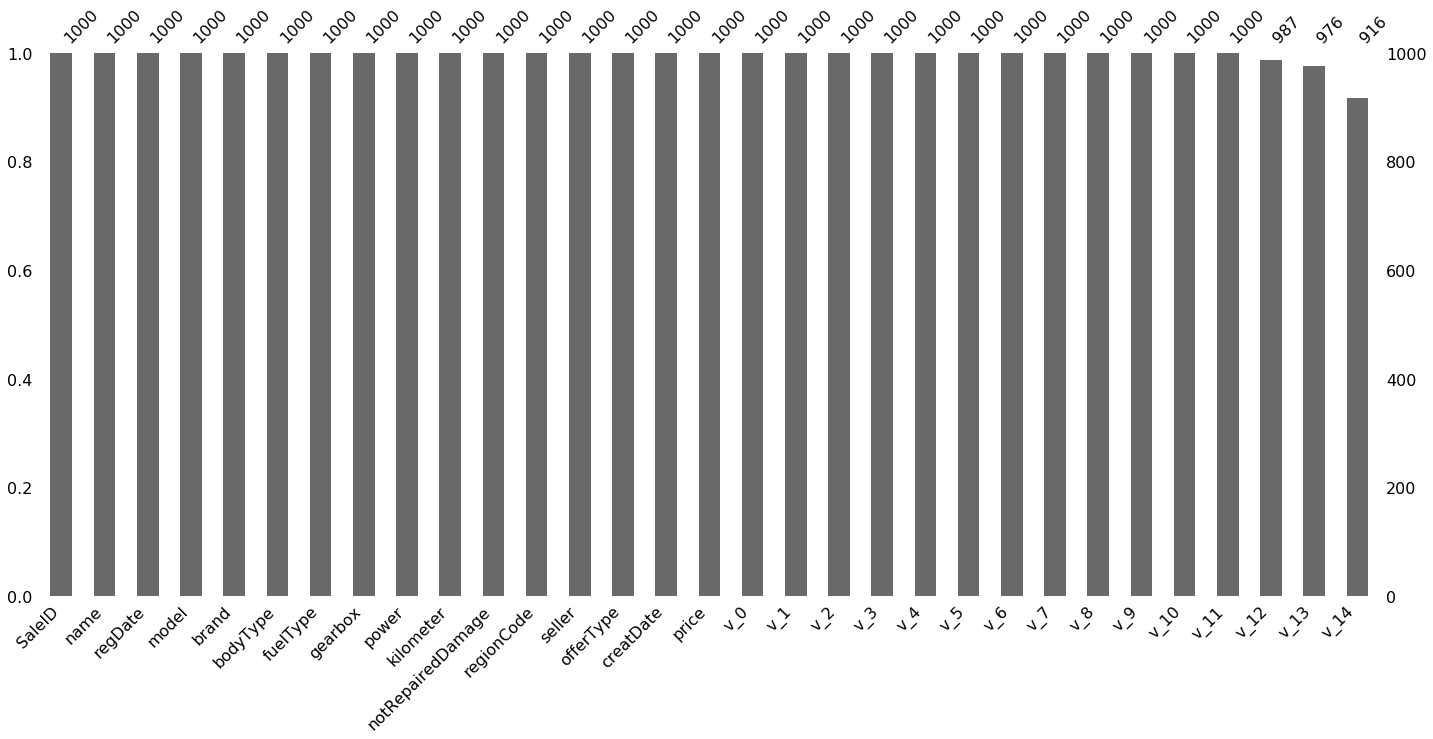

In [19]:
msno.bar(Train_data.sample(1000))

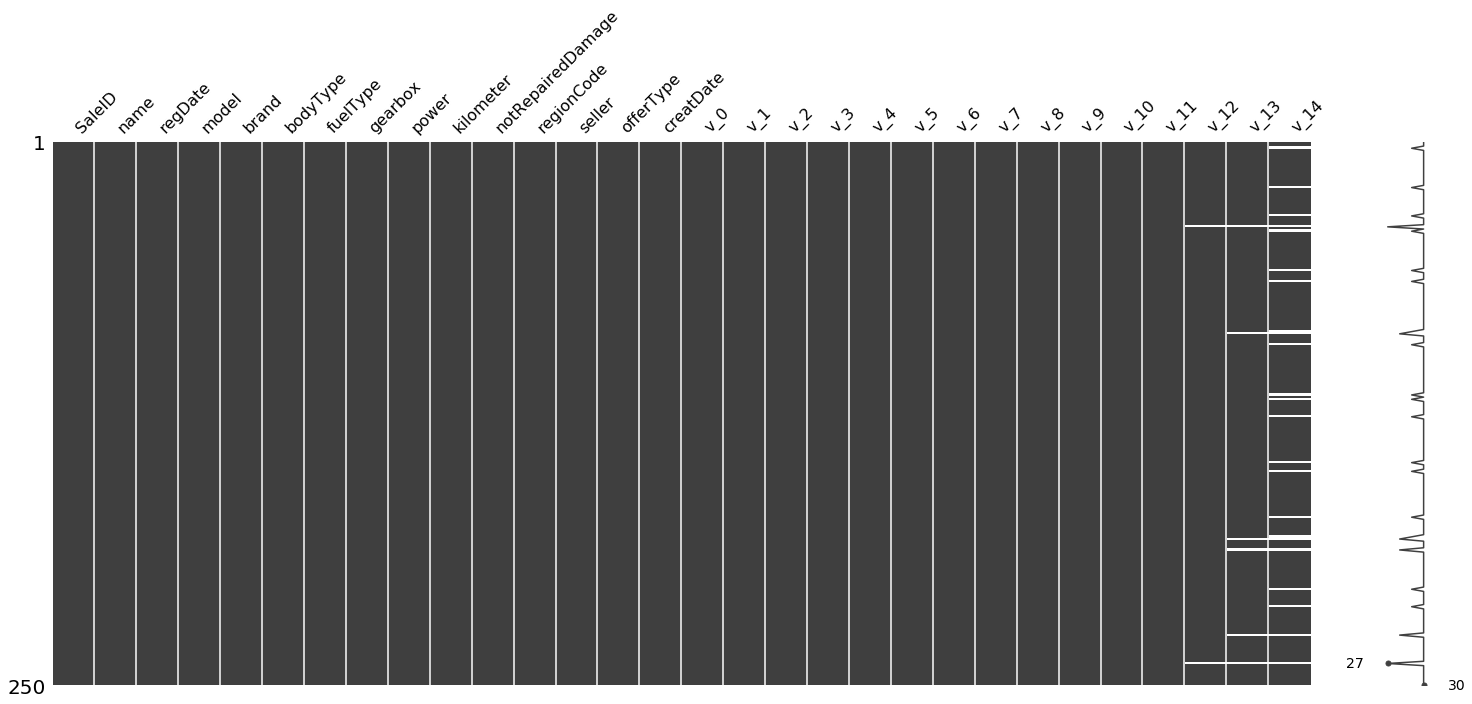

In [20]:
# 可视化看下缺省值
msno.matrix(Test_data.sample(250))

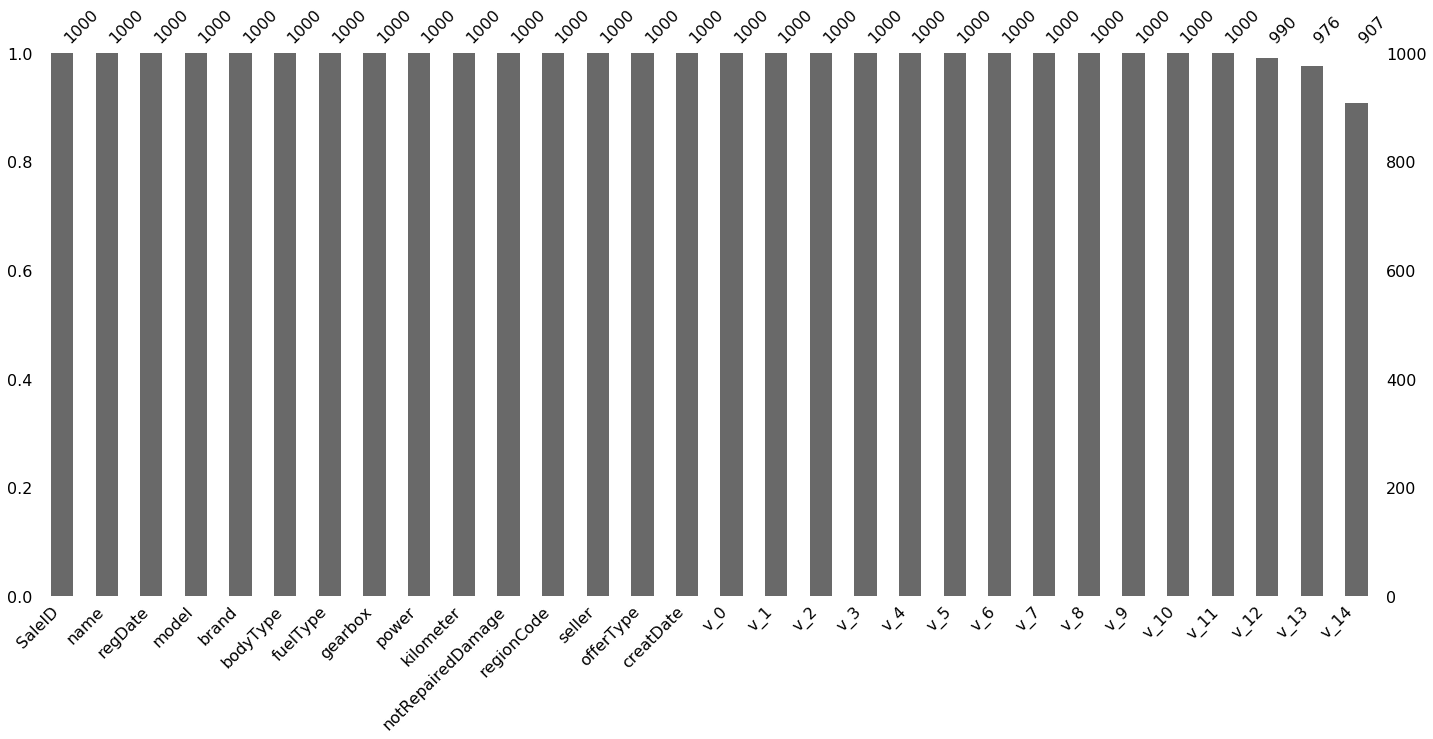

In [21]:
msno.bar(Test_data.sample(1000))

In [22]:
Train_data['notRepairedDamage'].value_counts()

0       109301
-        17558
1        12611
70          56
486         55
         ...  
6944         1
729          1
2964         1
4731         1
2955         1
Name: notRepairedDamage, Length: 4272, dtype: int64

In [40]:
Train_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [24]:
Train_data['notRepairedDamage'].value_counts()

0       109301
1        12611
70          56
486         55
1530        46
         ...  
6944         1
729          1
2964         1
4731         1
2955         1
Name: notRepairedDamage, Length: 4271, dtype: int64

In [26]:
Train_data['gearbox'].value_counts()

0        108237
1         31106
15         1519
-          1387
75          664
          ...  
29            1
292           1
366           1
19312         1
349           1
Name: gearbox, Length: 297, dtype: int64

In [27]:
Train_data['power'].value_counts()

75      8798
0       7816
15      7795
150     6091
60      5781
        ... 
1153       1
2247       1
6452       1
3325       1
1582       1
Name: power, Length: 1561, dtype: int64

In [28]:
Train_data['kilometer'].value_counts()

15      86699
12.5    14534
0        6450
10       5978
9        4927
        ...  
3945        1
6439        1
5495        1
4291        1
2502        1
Name: kilometer, Length: 1577, dtype: int64

In [41]:
Train_data['gearbox'].replace('-', np.nan, inplace=True)

In [30]:
Train_data['gearbox'].value_counts()

0        108237
1         31106
15         1519
75          664
60          500
          ...  
29            1
292           1
366           1
19312         1
349           1
Name: gearbox, Length: 296, dtype: int64

In [31]:
Train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    0
brand                    0
bodyType                 0
fuelType                 0
gearbox               1387
power                    0
kilometer                0
notRepairedDamage    17558
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                  1469
v_13                  3583
v_14                 14116
dtype: int64

In [32]:
Train_data["seller"].value_counts()

0           146416
20160314        91
20160321        88
20160310        86
20160319        85
             ...  
19000            1
1003             1
1899             1
1199             1
7999             1
Name: seller, Length: 332, dtype: int64

In [42]:
Train_data["offerType"].value_counts()

0.000000e+00    135884
2.016031e+07       434
2.016031e+07       406
2.016032e+07       401
2.016032e+07       398
                 ...  
3.265394e+01         1
3.627125e+01         1
3.306251e+01         1
3.547395e+01         1
3.726182e+01         1
Name: offerType, Length: 1898, dtype: int64

In [43]:
del Train_data["seller"]
del Train_data["offerType"]
del Test_data["seller"]
del Test_data["offerType"]

### 2.3.5 了解预测值的分布

In [44]:
Train_data['price']

0         1850.0
1         3600.0
2         6222.0
3         2400.0
4         5200.0
           ...  
149995    5900.0
149996    9500.0
149997    7500.0
149998    4999.0
149999    4700.0
Name: price, Length: 150000, dtype: float64

In [45]:
Train_data['price'].value_counts()

 500.000000     1956
 1500.000000    1892
 1200.000000    1688
 2500.000000    1591
 1000.000000    1528
                ... 
 42.174369         1
-3.164616          1
 40.433573         1
 42.150470         1
 768.000000        1
Name: price, Length: 17456, dtype: int64

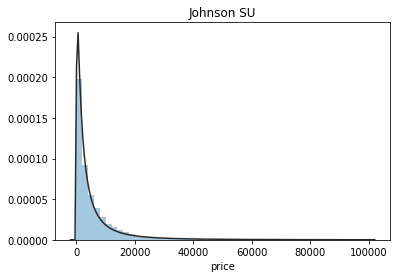

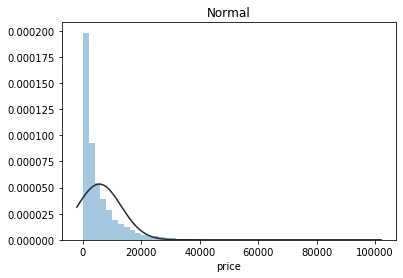

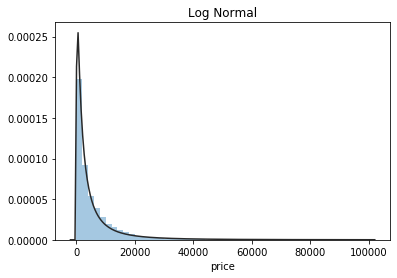

In [46]:
## 1) 总体分布概况（无界约翰逊分布等）
import scipy.stats as st
y = Train_data['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

价格不服从正态分布，所以在进行回归之前，它必须进行转换，虽然对数变换做得很好，但最佳拟合是无界约翰逊分布

Skewness: 3.259240
Kurtosis: 17.966895


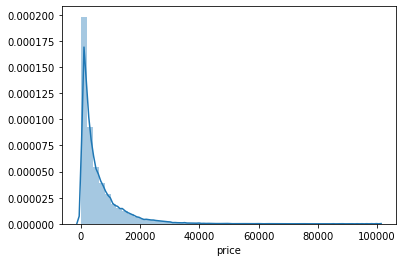

In [47]:
## 2) 查看skewness and kurtosis
sns.distplot(Train_data['price']);
print("Skewness: %f" % Train_data['price'].skew())
print("Kurtosis: %f" % Train_data['price'].kurt())

In [48]:
Train_data.skew(), Train_data.kurt()

(SaleID                 0.000000
 name                   0.557606
 regDate                0.028495
 model                  1.484396
 brand                  1.150662
 bodyType              72.267715
 fuelType              92.831088
 gearbox              193.106521
 notRepairedDamage      5.123612
 regionCode             9.955996
 creatDate             -2.780338
 price                  3.259240
 v_0                   -2.765477
 v_1                    0.877980
 v_2                    0.919860
 v_3                    0.057813
 v_4                    0.320513
 v_5                    5.328188
 v_6                    7.384523
 v_7                   10.738620
 v_8                    7.647080
 v_9                    5.478185
 v_10                   0.460554
 v_11                   0.323848
 v_12                   0.087052
 v_13                   0.220220
 v_14                  -1.203489
 dtype: float64, SaleID                  -1.200000
 name                    -1.039945
 regDate               

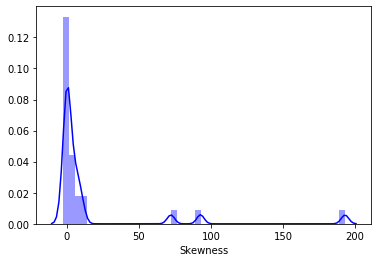

In [49]:
sns.distplot(Train_data.skew(),color='blue',axlabel ='Skewness')

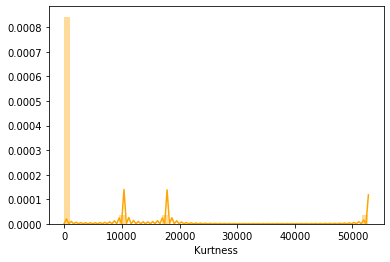

In [50]:
sns.distplot(Train_data.kurt(),color='orange',axlabel ='Kurtness')

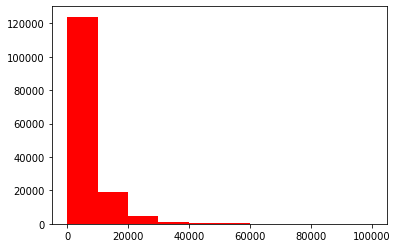

In [51]:
## 3) 查看预测值的具体频数
plt.hist(Train_data['price'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

查看频数, 大于20000得值极少，其实这里也可以把这些当作特殊得值（异常值）直接用填充或者删掉，在前面进行

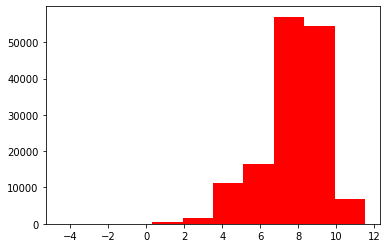

In [52]:
# log变换 z之后的分布较均匀，可以进行log变换进行预测，这也是预测问题常用的trick
plt.hist(np.log(Train_data['price']), orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

### 2.3.6 特征分为类别特征和数字特征，并对类别特征查看unique分布

#### 数据类型
**列**
* name - 汽车编码
* regDate - 汽车注册时间
* model - 车型编码
* brand - 品牌
* bodyType - 车身类型
* fuelType - 燃油类型
* gearbox - 变速箱
* power - 汽车功率
* kilometer - 汽车行驶公里
* notRepairedDamage - 汽车有尚未修复的损坏
* regionCode - 看车地区编码
* seller - 销售方 【已删】
* offerType - 报价类型 【已删】
* creatDate - 广告发布时间
* price - 汽车价格
* v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14'（根据汽车的评论、标签等大量信息得到的embedding向量）【人工构造 匿名特征

In [53]:
# 分离label即预测值
Y_train = Train_data['price']

In [57]:
# 这个区别方式适用于没有直接label coding的数据
# 这里不适用，需要人为根据实际含义来区分
# 数字特征
numeric_features=Train_data.select_dtypes(include=[np.number])
numeric_features.columns
# 类别特征
categorical_fetures=Train_data.select_dtypes(include=[np.object])
categorical_fetures.columns

Index(['gearbox', 'power', 'kilometer', 'notRepairedDamage'], dtype='object')

In [61]:
numberic_features=['power','kilometer','v_0','v_1','v_2','v_3','v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14']
categorical_features=['name','model','brand','bodyType','fuelType','gearbox','notRepairedDamage','regionCode']

In [63]:
# 训练集特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有{}个不同的值".format(cat_fea, Train_data[cat_fea].nunique()))
    print(Train_data[cat_fea].value_counts())

name的特征分布如下：
name特征有99662个不同的值
708       282
387       282
55        280
1541      263
203       233
         ... 
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
model的特征分布如下：
model特征有248个不同的值
0      11762
19      9573
4       8445
1       6038
29      5186
       ...  
242        2
245        2
240        2
209        2
247        1
Name: model, Length: 248, dtype: int64
brand的特征分布如下：
brand特征有40个不同的值
0     31480
4     16737
14    16089
10    14249
1     13794
6     10218
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      332
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int64
bodyType的特征分布如下：
bodyType特

In [64]:
# 测试集特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, Test_data[cat_fea].nunique()))
    print(Test_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个37453不同的值
55       97
708      96
387      95
1541     88
713      74
         ..
22270     1
89855     1
42752     1
48899     1
11808     1
Name: name, Length: 37453, dtype: int64
model的特征分布如下：
model特征有个247不同的值
0      3896
19     3245
4      3007
1      1981
29     1742
       ... 
246       1
240       1
244       1
242       1
243       1
Name: model, Length: 247, dtype: int64
brand的特征分布如下：
brand特征有个40不同的值
0     10348
4      5763
14     5314
10     4766
1      4532
6      3502
9      2423
5      1569
13     1245
11      919
7       795
3       773
16      771
8       704
25      695
27      650
21      544
15      511
20      450
19      450
12      389
22      363
30      324
17      317
26      303
24      268
28      225
32      193
29      117
31      115
18      106
2       104
37       92
34       77
33       76
36       67
23       62
35       53
38       23
39        2
Name: brand, dtype: int64
bodyType的特征分布如下：
bodyType特征有个31不同的值
0      15112
1      121

### 2.3.7 数字特征分析

In [73]:
numberic_features.append('price')

In [74]:
numberic_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

In [75]:
Train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30,6,1,0.0,0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914763
1,1,2262,20030301,40,1,2,0.0,0,0,15,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115,15,1,0.0,0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109,10,0,0.0,1,193,15,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110,5,1,0.0,0,68,5,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [76]:
# 1)相关性分析
price_numberic=Train_data[numberic_features]
correlation=price_numberic.corr()
print(correlation['price'].sort_values(ascending=False),'\n')

price    1.000000
v_12     0.754712
v_0      0.338554
v_2      0.333308
v_5      0.093762
v_14     0.027706
v_1      0.014562
v_13    -0.020419
v_7     -0.064177
v_6     -0.065987
v_8     -0.090501
v_9     -0.135345
v_4     -0.157950
v_10    -0.239397
v_11    -0.335928
v_3     -0.710994
Name: price, dtype: float64 



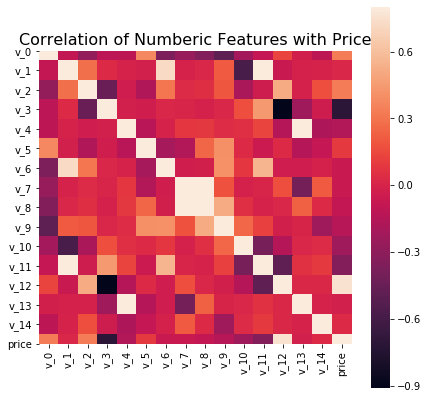

In [77]:
f,ax=plt.subplots(figsize=(7,7))
plt.title('Correlation of Numberic Features with Price',y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

In [78]:
del price_numberic['price']

In [81]:
Train_data.replace('-', np.nan, inplace=True)
# 2) 查看几个特征的偏度和峰值
for col in numberic_features:
    print('{:15}'.format(col),
         'Skewness: {:05.2f}'.format(Train_data[col].skew()),
         ' ',
         'Kurtosis: {:06.2f}'.format(Train_data[col].kurt())
         )

power           Skewness: 17.34   Kurtosis: 444.79
kilometer       Skewness: 12.43   Kurtosis: 171.91
v_0             Skewness: -2.77   Kurtosis: 006.01
v_1             Skewness: 00.88   Kurtosis: 000.91
v_2             Skewness: 00.92   Kurtosis: 003.37
v_3             Skewness: 00.06   Kurtosis: -00.43
v_4             Skewness: 00.32   Kurtosis: -00.02
v_5             Skewness: 05.33   Kurtosis: 048.84
v_6             Skewness: 07.38   Kurtosis: 062.79
v_7             Skewness: 10.74   Kurtosis: 115.77
v_8             Skewness: 07.65   Kurtosis: 060.47
v_9             Skewness: 05.48   Kurtosis: 037.33
v_10            Skewness: 00.46   Kurtosis: 001.45
v_11            Skewness: 00.32   Kurtosis: 000.73
v_12            Skewness: 00.09   Kurtosis: -00.45
v_13            Skewness: 00.22   Kurtosis: -00.36
v_14            Skewness: -1.20   Kurtosis: 002.35
price           Skewness: 03.26   Kurtosis: 017.97


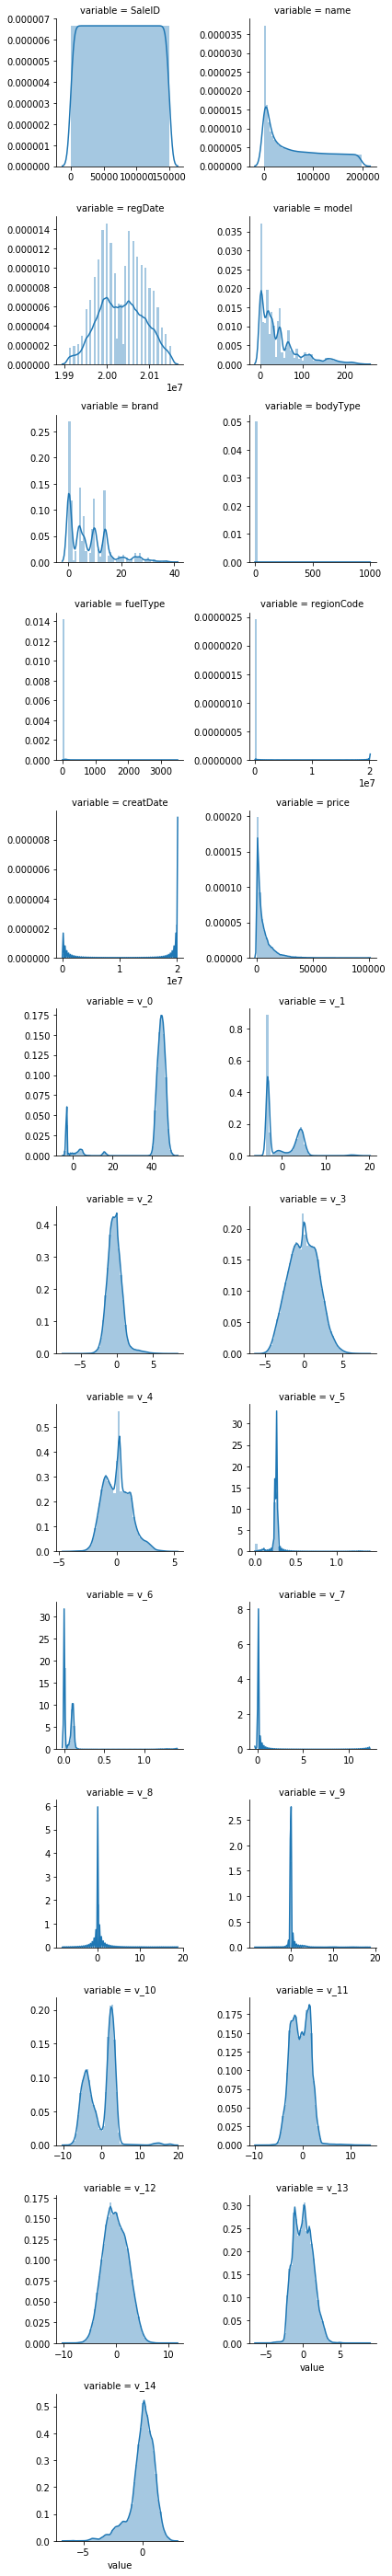

In [84]:
# 3)每个数字特征的分布可视化
f = pd.melt(Train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

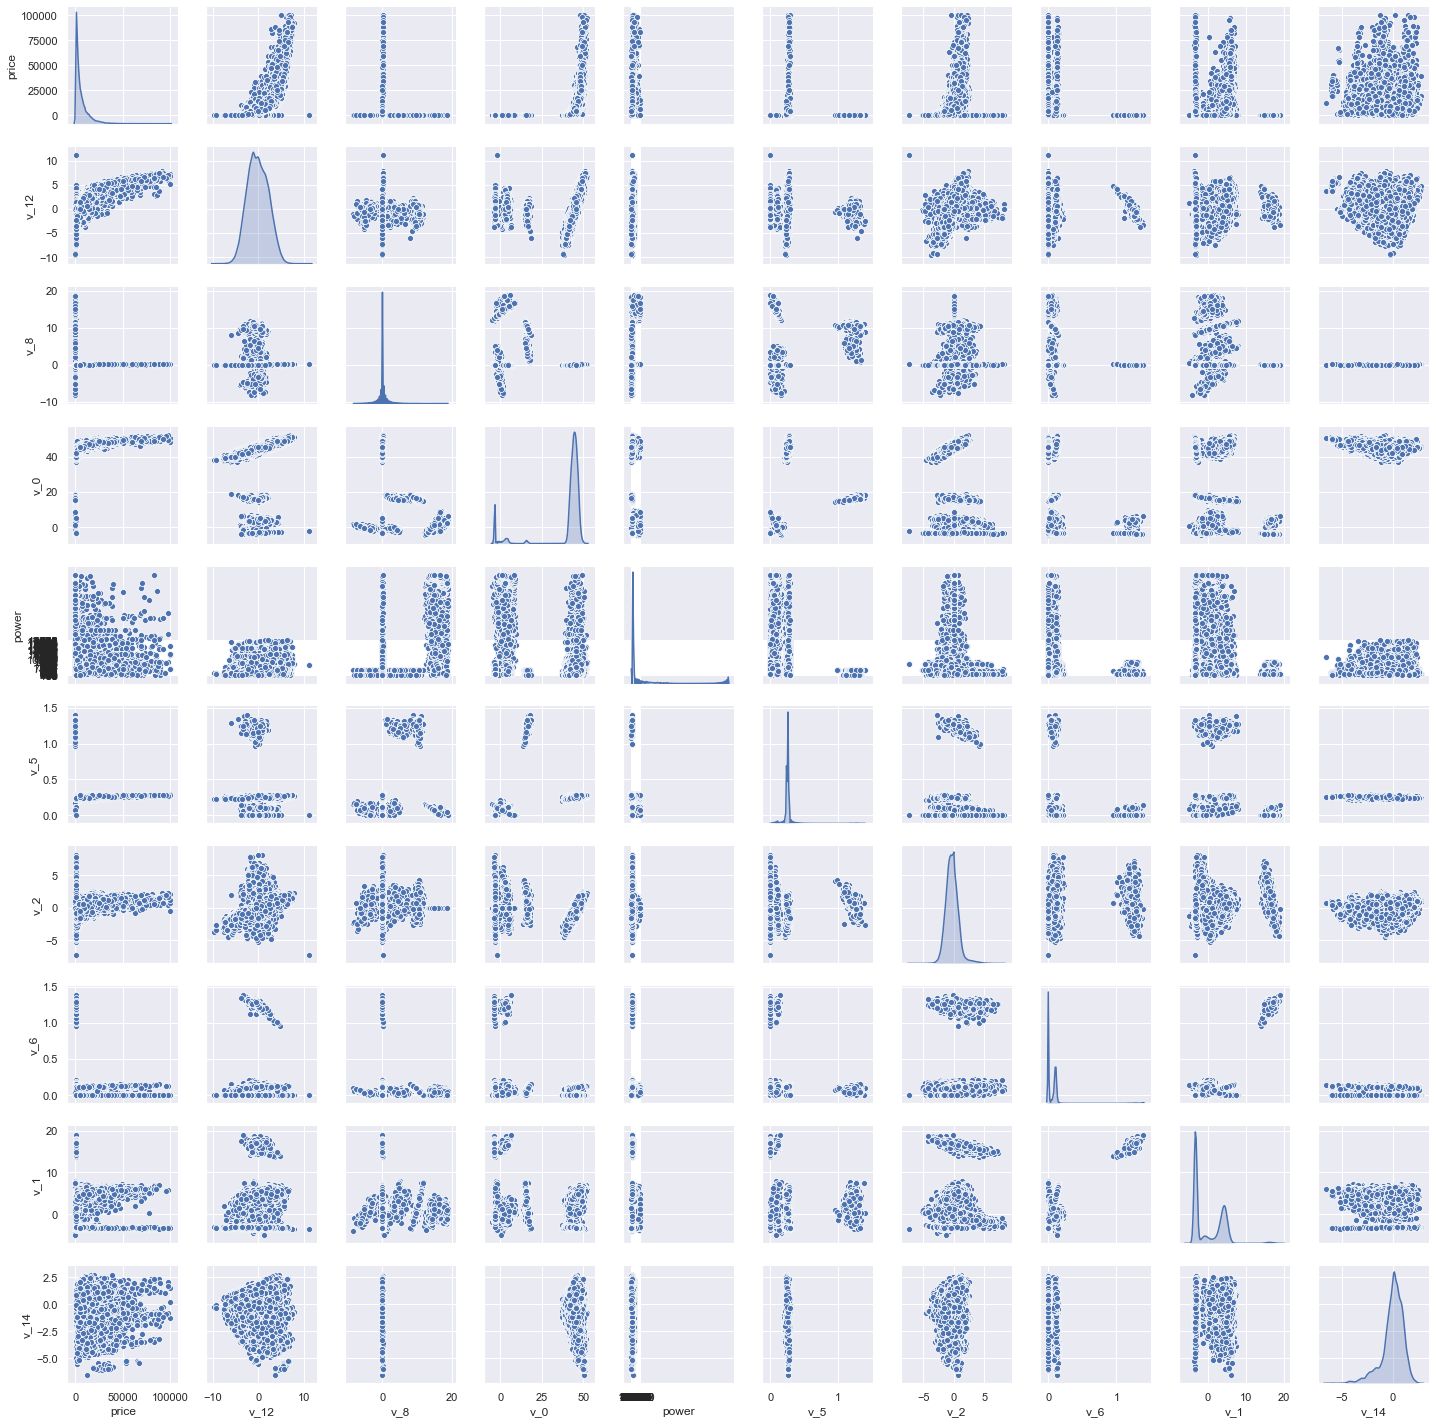

In [89]:
# 4)数字特征相互之间的关系可视化
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5', 'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(Train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

In [88]:
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

In [90]:
Y_train

0         1850.0
1         3600.0
2         6222.0
3         2400.0
4         5200.0
           ...  
149995    5900.0
149996    9500.0
149997    7500.0
149998    4999.0
149999    4700.0
Name: price, Length: 150000, dtype: float64

### 2.3.8 类别特征分析

In [93]:
# unique
for fea in categorical_features:
    print(Train_data[fea].nunique())

99662
248
40
74
174
296
4271
7886


In [95]:
categorical_features

['name',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage',
 'regionCode']

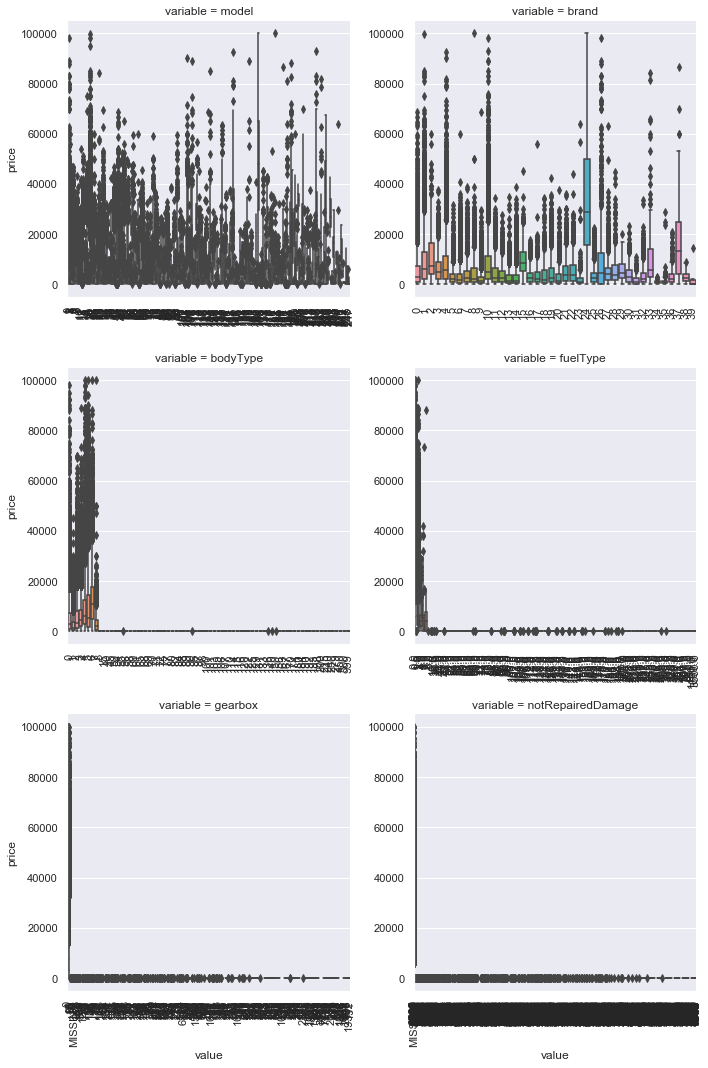

In [99]:
## 2) 类别特征箱形图可视化
# 因为name和regionCode的类别太稀疏了，这里我们把不稀疏的几类画一下
categorical_features=['model','brand','bodyType','fuelType','gearbox','notRepairedDamage']
for c in categorical_features:
    Train_data[c] = Train_data[c].astype('category')
    if Train_data[c].isnull().any():
        Train_data[c] = Train_data[c].cat.add_categories(['MISSING'])
        Train_data[c] = Train_data[c].fillna('MISSING')
        
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)

f=pd.melt(Train_data,id_vars=['price'],value_vars=categorical_features)
g=sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False,sharey=False,size=5)
g=g.map(boxplot,"value","price")
        

In [100]:
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

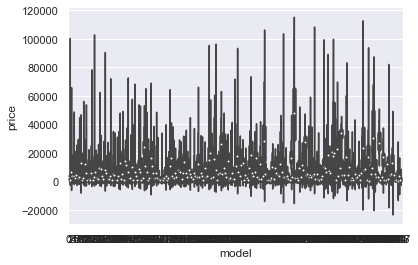

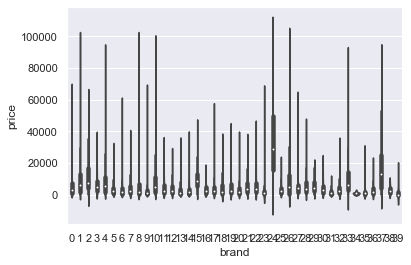

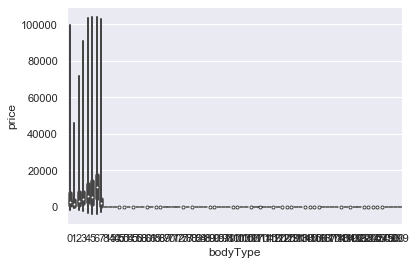

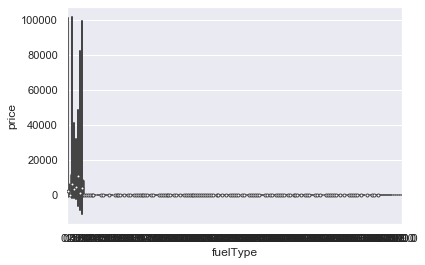

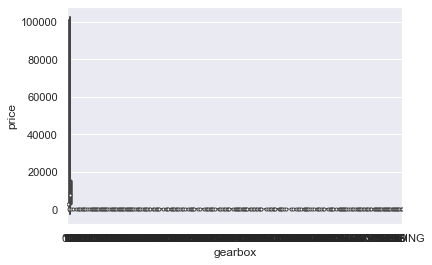

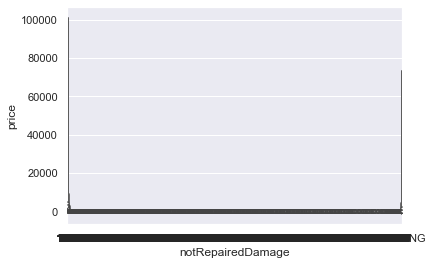

In [102]:
# 3)类别特征的小提琴可视化
catg_list=categorical_features
target='price'
for catg in catg_list:
    sns.violinplot(x=catg,y=target,data=Train_data)
    plt.show()

In [103]:
categorical_features=['model','brand','bodyType','fuelType','gearbox','notRepairedDamage']

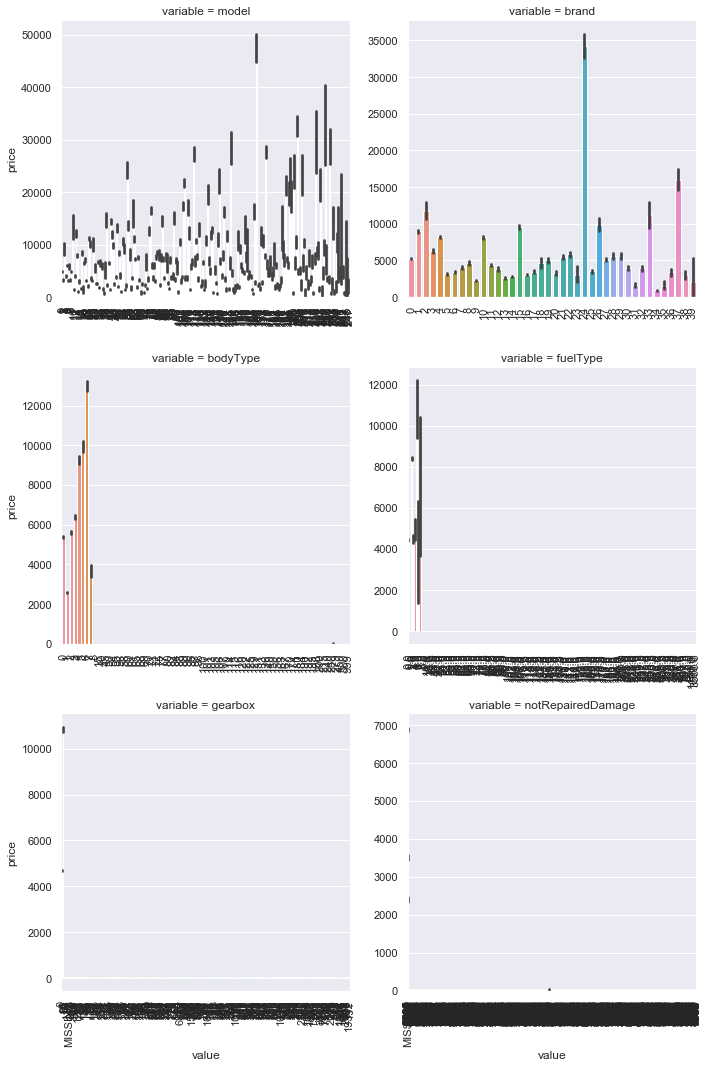

In [105]:
# 4) 类别特征的柱形图可视化
def bar_plot(x,y,**kwargs):
    sns.barplot(x=x,y=y)
    x=plt.xticks(rotation=90)
    
f=pd.melt(Train_data,id_vars=['price'],value_vars=categorical_features)
g=sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False,sharey=False,size=5)
g=g.map(bar_plot,"value","price")

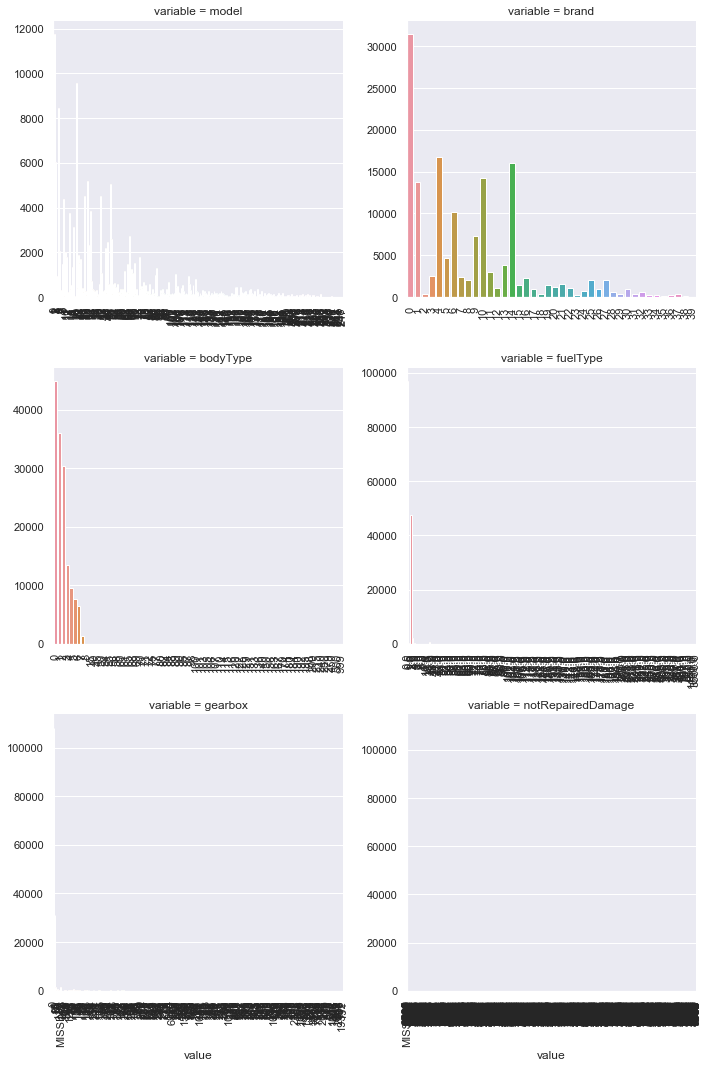

In [107]:
# 5) 类别特征的每个类别频数可视化(count_plot)
def count_plot(x,**kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)

f=pd.melt(Train_data,value_vars=categorical_features)
g=sns.FacetGrid(f,col="variable",col_wrap=2,sharex=False,sharey=False,size=5)
g=g.map(count_plot,"value")

In [111]:
import pandas_profiling

ModuleNotFoundError: No module named 'pandas_profiling'